# Librerias

In [39]:
import importlib
import os, shutil
import numpy as np
import pandas as pd

from tkinter import *
from tkinter.messagebox import askokcancel

from IPython.display import clear_output

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

import plotly.io as pio
pio.renderers.default = 'browser'

import matplotlib.pyplot as plt   # plotting

import rai_exp_2023_sivarita as exp
importlib.reload(exp)

import Sivarita
importlib.reload(Sivarita)

<module 'Sivarita' from 'c:\\repositorios\\rai_exp_2023_sivarita\\Sivarita.py'>

# Preparar datos

Cargar brazo afectado

In [34]:
path = "./_data_/"

df_brazo = pd.read_excel(path + "participantes_datos_analisis.xlsx")
df_brazo.sample(9)

,nombre,id,brazo,FM,grupo
0,Carmen _Saez,1,R,55,leve
2,Angela_Mayor,3,R,64,leve
5,Jose Andres_Ferrer Ferrer,6,R,42,moderado
6,María _Martinez,7,R,66,maximo
7,Isabel_Cuenca,8,R,66,maximo
8,Vicenta_Beneyto,9,R,66,maximo
1,Teresa_García,2,R,64,leve
3,Lusia Maria_Pereiro Sousa,4,L,29,moderado
4,Anissa_Benssuz,5,L,36,moderado


Cargar datos

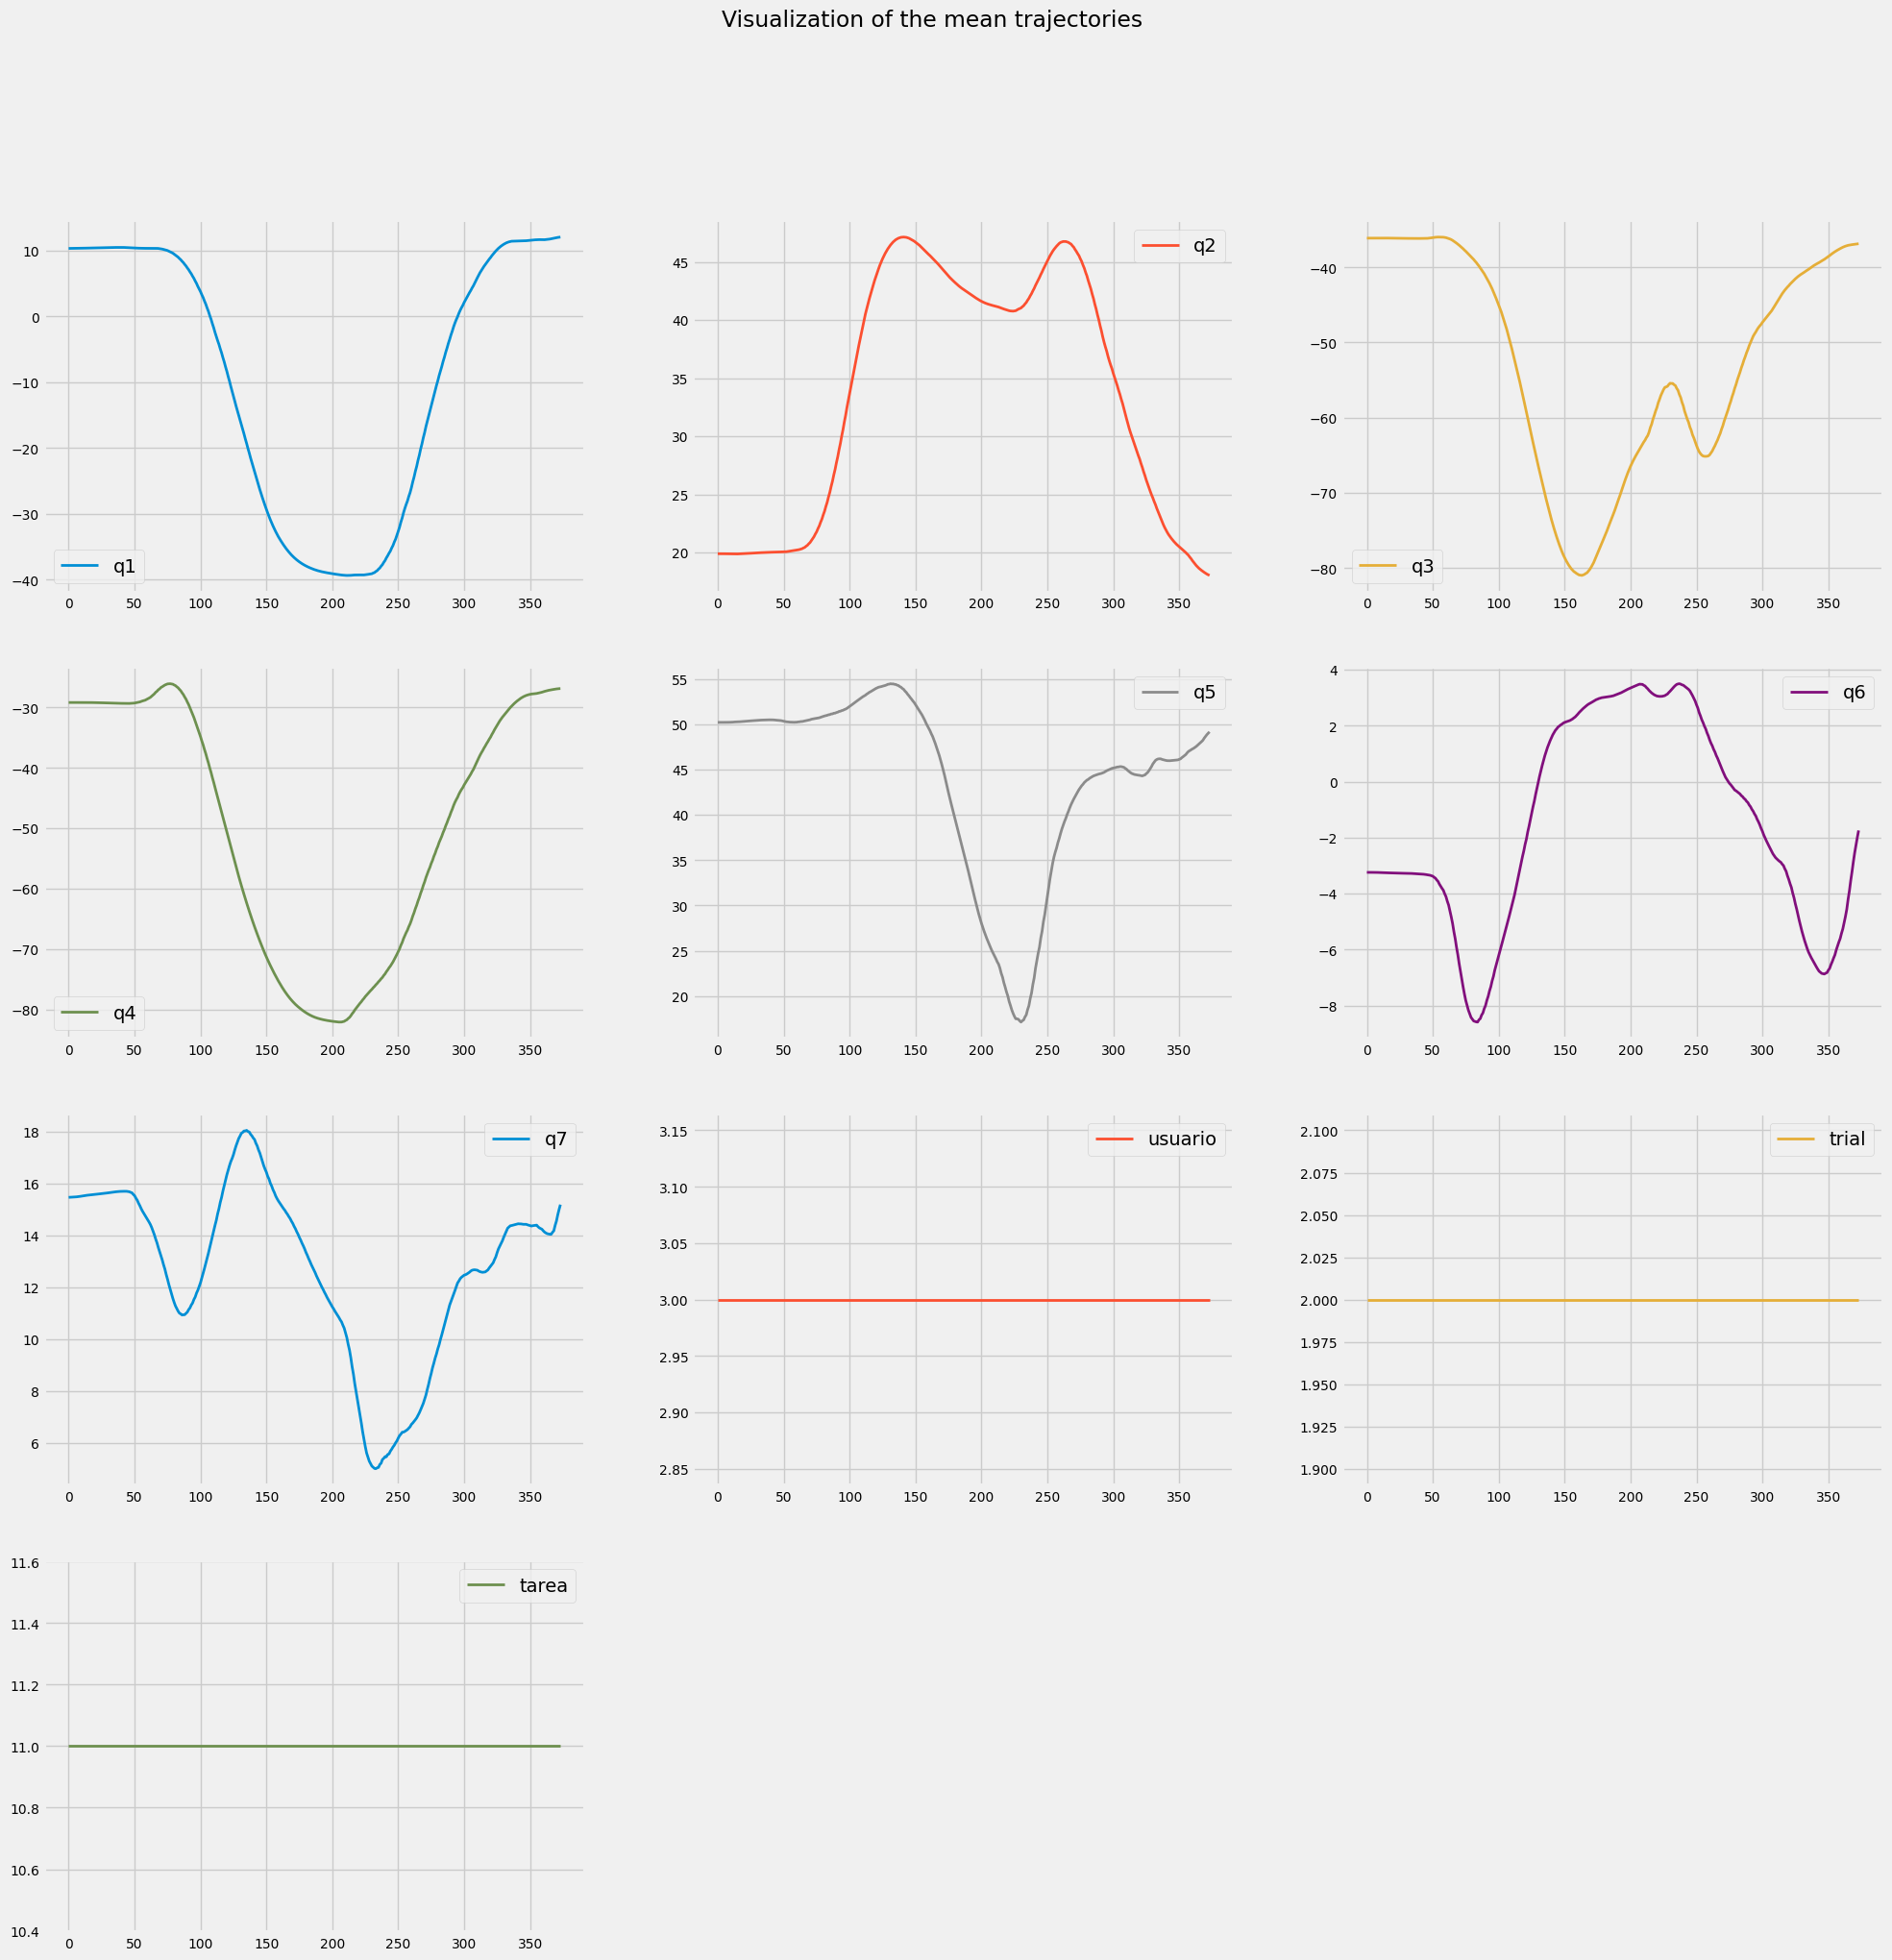

In [13]:
#Datos trayectorias usuarios sanos
df_csv =  pd.read_csv('./tareas/tarea_12.csv')
df_csv = df_csv.drop(columns=['ts'])


df_csv['q1'] = df_csv['q1'].multiply(180 / np.pi)
df_csv['q2'] = df_csv['q2'].multiply(180 / np.pi)
df_csv['q3'] = df_csv['q3'].multiply(180 / np.pi)
df_csv['q4'] = df_csv['q4'].multiply(180 / np.pi)
df_csv['q5'] = df_csv['q5'].multiply(180 / np.pi)
df_csv['q6'] = df_csv['q6'].multiply(180 / np.pi)
df_csv['q7'] = df_csv['q7'].multiply(180 / np.pi)

# Plot the time series
plt.style.use('fivethirtyeight')
df_csv.plot(subplots=True,
        layout=(4, 3),
        figsize=(22,22),
        fontsize=10, 
        linewidth=2,
        sharex=False,
        title='Visualization of the mean trajectories')
plt.show()







In [17]:
#Path
path = "./_data_/Usuarios/"

#Cargar datos
df_data = exp.loadData(path)
df_data.sample(5)

,usuario,sesion,actividad,tipo_actividad,upper_size,fore_size,brazo,num_rep,dataFrame,dataFrameIA
188,Francisco_Ballester Marin,2023_3_29_16_15_25,MoveGlass,LLENADO,280.0,250.0,R,4.0,q1 q2 q3 q...,tarea data_org_1 data_pred_1 data_org_2 ...
136,Carmen_Cerrillo,2023_3_23_11_25_39,MoveGlass,BEBER,280.0,250.0,L,4.0,q1 q2 q3 ...,tarea data_org_1 data_pred_1 data_org_2 ...
212,Isabel_Cuenca,2023_3_23_10_54_23,TouchGame,HOMBRO,280.0,250.0,L,4.0,q1 q2 q3 ...,tarea data_org_1 data_pred_1 data_org_2 ...
90,Angeles_Cita Garrido,2023_4_24_12_7_37,TouchGame,NARIZ,280.0,250.0,L,4.0,q1 q2 q3 ...,tarea data_org_1 data_pred_1 data_org_2 ...
110,Anissa_Benssuz,2023_3_27_9_21_56,TouchGame,CABEZA,280.0,250.0,R,4.0,q1 q2 q3 ...,tarea data_org_1 data_pred_1 data_org_2 ...


Procesar parámetros

In [18]:
count_vacio = 0
count_correcto = 0

for i_row in range(df_data.shape[0]):
    if df_data.dataFrameIA[i_row].empty is True:
        df_data = df_data.drop(i_row)
        count_vacio = count_vacio + 1
    else:
        count_correcto = count_correcto + 1

df_data.reset_index(drop=True, inplace=True)
print("Correctos: {0}".format(count_correcto))
print("Vacíos: {0}".format(count_vacio))
df_data.sample(5)



Correctos: 342
Vacíos: 11


,usuario,sesion,actividad,tipo_actividad,upper_size,fore_size,brazo,num_rep,dataFrame,dataFrameIA
75,Angeles_Cita Garrido,2023_4_24_12_0_0,PaintForms,TRIÁNGULO,280.0,250.0,L,4.0,q1 q2 q3 ...,tarea data_org_1 data_pred_1 data_org_2 ...
221,Jose Andres_Ferrer Ferrer,2023_4_24_11_27_8,TouchGame,HOMBRO,280.0,250.0,R,4.0,q1 q2 q3 ...,tarea data_org_1 data_pred_1 data_org_2 ...
128,Carmen_Cerrillo,2023_3_23_11_22_34,MoveGlass,BEBER,280.0,250.0,R,4.0,q1 q2 q3 q...,tarea data_org_1 data_pred_1 data_org_2 ...
50,Angela_Mayor,2023_5_12_9_32_46,PaintForms,CUADRADO,280.0,250.0,L,4.0,q1 q2 q3 ...,tarea data_org_1 data_pred_1 data_org_2 ...
114,Carmen _Saez,2023_3_23_12_17_28,Move_Cube,DESPLAZAR,280.0,250.0,R,4.0,q1 q2 q3 ...,tarea data_org_1 data_pred_1 data_org_2 ...


In [19]:
# Obtener los rangos articulares para cada paciente
df_params = exp.process_all_params(df_data)
df_params.sample(5)

,usuario,session,activity,tipo_actividad,brazo,DTW_error,Porcentaje_pred,MAX_Q1,MAX_Q2,MAX_Q3,...,MAX_Q5,MAX_Q6,MAX_Q7,MIN_Q1,MIN_Q2,MIN_Q3,MIN_Q4,MIN_Q5,MIN_Q6,MIN_Q7
183,Francisco_Ballester Marin,2023_3_29_16_17_33,Move_Cube,DEPOSITAR,R,9.847475,58.333333,62.391318,62.451497,-3.614933,...,132.128779,-20.018870,62.556461,32.162743,32.257420,-38.354116,-20.355198,59.014842,-46.837753,-3.976330
24,Ana_Adsuar,2023_4_28_9_51_42,Move_Cube,DESPLAZAR,L,7.362802,0.000000,56.727427,76.119820,20.669410,...,113.349790,-1.578601,19.488593,-36.469207,39.868087,-100.938388,-60.663789,32.731213,-16.760092,-19.577592
254,Lusia Maria_Pereiro Sousa,2023_4_21_12_16_39,PaintForms,CUADRADO,R,12.859170,0.000000,51.600277,63.599930,-29.423449,...,103.901368,-45.262297,38.501808,19.447646,27.953901,-81.324494,-9.975142,40.644487,-64.224866,-9.937572
261,Lusia Maria_Pereiro Sousa,2023_3_27_10_2_8,TouchGame,CABEZA,L,4.091292,100.000000,164.122103,76.239789,122.969702,...,163.661643,2.699388,5.721710,11.808795,37.335585,-54.009632,-46.063252,66.029029,-19.677664,-21.156656
154,Devra_Mendez Marin,2023_5_8_16_14_53,MoveGlass,LLENADO,R,6.470502,100.000000,61.938432,58.126043,-6.347843,...,146.849765,-10.034666,59.488186,46.861742,27.443117,-31.137924,-23.311509,57.597376,-36.660251,-4.452452


In [32]:
#brazo = df_brazo[df_brazo['nombre'] == 'Angela_Mayor', 'brazo'].values[0]#
#df_params[(df_params.usuario =="Angela_Mayor") & (df_params.brazo == 'R')].MAX_Q1
df_brazo[df_brazo.grupo == "leve"].nombre



0     Carmen _Saez
1    Teresa_García
2     Angela_Mayor
Name: nombre, dtype: object

In [210]:
df_brazo

,nombre,id,brazo,FM,grupo
0,Carmen _Saez,1,R,55,leve
1,Teresa_García,2,R,64,leve
2,Angela_Mayor,3,R,64,leve
3,Lusia Maria_Pereiro Sousa,4,L,29,moderado
4,Anissa_Benssuz,5,L,36,moderado
5,Jose Andres_Ferrer Ferrer,6,R,42,moderado
6,María _Martinez,7,R,66,maximo
7,Isabel_Cuenca,8,R,66,maximo
8,Vicenta_Beneyto,9,R,66,maximo


In [ ]:
df_brazo

In [40]:
# for itere grupos
hawer = df_brazo.grupo.unique()
df_group = []
group_list = []
for group in hawer:
    # filtrar grupo
    group_list.append(group)
    df_group.append(exp.process_byGroups(df_brazo, df_params, group))

data = {
    'grupo': group_list,
    'dataframe': df_group
}

df = pd.DataFrame(data)
df.sample(3)




,grupo,dataframe
0,leve,user mean_MAXQ1 mean_MAXQ2 mean...
2,maximo,user mean_MAXQ1 mean_MAXQ2 me...
1,moderado,user mean_MAXQ1 mean...


In [43]:
df.dataframe[2]

,user,mean_MAXQ1,mean_MAXQ2,mean_MAXQ3,mean_MAXQ4,mean_MAXQ5,mean_MAXQ6,mean_MAXQ7,mean_dtw_error,mean_porc_pred
0,María _Martinez,64.136641,62.824485,-0.667612,32.116425,128.331097,-25.821439,54.898848,11.483392,44.270833
1,Isabel_Cuenca,64.136641,62.824485,-0.667612,32.116425,128.331097,-25.821439,54.898848,11.483392,44.270833
2,Vicenta_Beneyto,64.136641,62.824485,-0.667612,32.116425,128.331097,-25.821439,54.898848,11.483392,44.270833


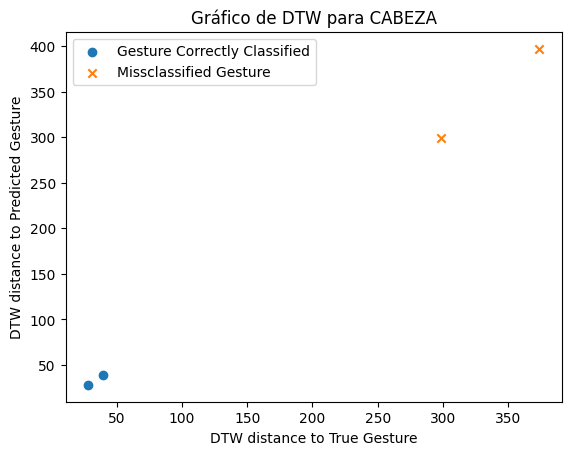

In [105]:
df = df_data.dataFrameIA[158]
tarea = df_data.tipo_actividad[158]
Sivarita.plotDTWparam(df, tarea)
